# Proyek Analisis Data: Nama dataset
- Nama: Adnan Cindyana
- Email: adnancindyana1234@gmail.com
- Id Dicoding: 2437 XP

## Menentukan Pertanyaan Bisnis

**Data Day**

Pertanyaan 1: Berapa frekuensi pada jumlah rental bike pada setiap bulan?

Pertanyaan 2: Bagaimana peforma jumlah rental bike pada setiap bulan?

Pertanyaan 3: Bagaimana performa rental bike perbulan pada tipe hari weekend, weekday, dan holiday?

**Data Hour**

Pertanyaan 4: Bagaimana peforma dalam rental sepeda pada hitungan jam?

Pertanyaan 5: Bagaimana performa jumlah rental sepeda pada 2 bulan?

Pertanyaan 6: Bagaimana performa rental bike dalam hitungan jam pada tipe hari weekend, weekday, dan holiday?

## Menyaipkan semua library yang dibuthkan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

## Data Wrangling

### Gathering Data

In [ ]:
day = pd.read_csv("https://raw.githubusercontent.com/adnancindyana/proyek_akhir_analsis_data/main/day.csv")
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
hour = pd.read_csv("https://raw.githubusercontent.com/adnancindyana/proyek_akhir_analsis_data/main/hour.csv")
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

Menilai Tabel Day

In [ ]:
day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
print("Jumlah duplikasi: ", day.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Menilai Tabel Hour

In [ ]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
hour.nunique()

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

In [ ]:
print("Jumlah duplikasi: ",hour.duplicated().sum())
hour.describe()


Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

Membersihkan Tabel day

duplicate data

In [ ]:
day.duplicated().sum()

0

missing value

In [ ]:
day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Membersihkan Tabel hour

In [ ]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
hour.duplicated().sum()

0

In [ ]:
hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Menggabungkan data

In [ ]:
day_hour = pd.merge(
    left=day,
    right=hour
)
day_hour.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,hr


## Exploratory Data Analysis (EDA)

**eksplore data day**

In [ ]:
day.sample(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
192,193,2011-07-12,3,0,7,0,2,1,1,0.794167,0.739275,0.559167,0.200254,662,3596,4258
644,645,2012-10-06,4,1,10,0,6,0,1,0.554167,0.538521,0.664167,0.268025,3031,4934,7965
546,547,2012-06-30,3,1,6,0,6,0,1,0.765000,0.687508,0.601250,0.161071,1455,4232,5687
628,629,2012-09-20,3,1,9,0,4,1,1,0.546667,0.532192,0.618333,0.118167,939,6781,7720
304,305,2011-11-01,4,0,11,0,2,1,1,0.400833,0.397088,0.683750,0.135571,410,3658,4068
407,408,2012-02-12,1,1,2,0,0,0,1,0.127500,0.101658,0.464583,0.409212,73,1456,1529
636,637,2012-09-28,4,1,9,0,5,1,2,0.619167,0.585863,0.690000,0.164179,1045,6370,7415
47,48,2011-02-17,1,0,2,0,4,1,1,0.435833,0.428658,0.505000,0.230104,259,2216,2475
63,64,2011-03-05,1,0,3,0,6,0,2,0.384167,0.378779,0.789167,0.251871,640,1437,2077
641,642,2012-10-03,4,1,10,0,3,1,2,0.657500,0.599133,0.793750,0.066546,728,6844,7572


In [ ]:
day.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [ ]:
day.casual.is_unique

False

In [ ]:
day.mnth.duplicated

<bound method Series.duplicated of 0       1
1       1
2       1
3       1
4       1
       ..
726    12
727    12
728    12
729    12
730    12
Name: mnth, Length: 731, dtype: int64>

In [ ]:
day.groupby(by="mnth").agg({
    "casual": "nunique",
    "casual": ["max", "min", "mean", "std", ]
})

casual                              
        max  min         mean         std
mnth                                     
1      1070    9   194.225806  197.384490
2      1435   47   262.508772  232.283549
3      3155   46   716.838710  624.308094
4      3252  120  1013.366667  738.345585
5      3410  255  1214.274194  754.950311
6      2963  477  1231.766667  664.017647
7      3065  562  1260.596774  598.382778
8      2827  226  1161.919355  466.576274
9      3160  118  1172.050000  738.378375
10     3031    2   963.870968  703.205576
11     2290   69   610.050000  470.933096
12     1153    9   349.887097  222.634531

In [ ]:
day.registered.is_unique

False

In [ ]:
day.registered.duplicated

<bound method Series.duplicated of 0       654
1       670
2      1229
3      1454
4      1518
       ... 
726    1867
727    2451
728    1182
729    1432
730    2290
Name: registered, Length: 731, dtype: int64>

In [ ]:
day.groupby(by="mnth").agg({
    "registered": "nunique",
    "registered": ["max", "min", "mean", "std", ]
})

registered                                
            max   min         mean          std
mnth                                           
1          4185   416  1982.112903  1053.274474
2          4546   905  2392.789474  1091.126003
3          5893   491  2975.419355  1513.254354
4          5950   674  3471.533333  1414.571151
5          6433  2213  4135.500000  1093.179612
6          6456  2993  4540.600000  1012.958885
7          6790  2298  4303.080645  1190.542490
8          6541   889  4502.500000  1335.126601
9          6946  1689  4594.466667  1547.716749
10         6911    20  4235.354839  1685.022519
11         5520   935  3637.133333  1219.589045
12         6055   432  3053.919355  1465.052959

In [ ]:
day.cnt.is_unique

False

In [ ]:
day.groupby(by="mnth").agg({
    "cnt": "nunique",
    "cnt": ["max", "min", "mean", "std", ]
})

cnt                                
       max   min         mean          std
mnth                                      
1     4521   431  2176.338710  1161.674370
2     5062  1005  2655.298246  1145.313307
3     8362   605  3692.258065  1899.301812
4     7460   795  4484.900000  1776.160778
5     8294  2633  5349.774194  1298.711561
6     8120  3767  5772.366667  1240.400031
7     8173  3285  5563.677419  1273.751871
8     7865  1115  5664.419355  1494.516146
9     8714  1842  5766.516667  1810.130649
10    8156    22  5199.225806  1988.392517
11    6852  1495  4247.183333  1285.712709
12    6606   441  3403.806452  1549.639353

In [ ]:
day.groupby(by="mnth").casual.nunique().sort_values(ascending=False)

mnth
5     62
10    62
7     61
3     60
4     60
12    60
9     59
8     58
1     57
11    57
6     56
2     52
Name: casual, dtype: int64

In [ ]:
day.groupby(by="mnth").registered.nunique().sort_values(ascending=False)

mnth
10    62
12    62
1     61
3     61
5     61
8     61
4     60
7     60
9     60
11    60
6     58
2     57
Name: registered, dtype: int64

**ekplore data hour**

In [ ]:
hour.sample(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
3727,3728,2011-06-09,2,0,6,5,0,4,1,2,0.70,0.6667,0.84,0.0000,1,19,20
12965,12966,2012-06-29,3,1,6,10,0,5,1,1,0.90,0.8333,0.39,0.2985,32,139,171
9013,9014,2012-01-16,1,1,1,10,1,1,0,2,0.14,0.1364,0.59,0.1940,19,107,126
16823,16824,2012-12-08,4,1,12,18,0,6,0,1,0.40,0.4091,0.87,0.1045,40,264,304
9767,9768,2012-02-16,1,1,2,22,0,4,1,2,0.32,0.3485,0.81,0.0000,3,108,111
15070,15071,2012-09-25,4,1,9,3,0,2,1,1,0.42,0.4242,0.71,0.0896,2,3,5
16519,16520,2012-11-26,4,1,11,1,0,1,1,1,0.20,0.2576,0.69,0.0000,1,9,10
13339,13340,2012-07-15,3,1,7,0,0,0,0,1,0.68,0.6364,0.89,0.1642,40,147,187
8811,8812,2012-01-07,1,1,1,23,0,6,0,1,0.42,0.4242,0.38,0.2239,16,103,119
13637,13638,2012-07-27,3,1,7,10,0,5,1,1,0.84,0.7727,0.47,0.0000,85,146,231


In [ ]:
hour.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


In [ ]:
hour.casual.is_unique

False

In [ ]:
hour.hr.duplicated

<bound method Series.duplicated of 0         0
1         1
2         2
3         3
4         4
         ..
17374    19
17375    20
17376    21
17377    22
17378    23
Name: hr, Length: 17379, dtype: int64>

In [ ]:
hour.groupby(by="hr").agg({
    "casual": "nunique",
    "casual": ["max", "min", "mean", "std", ]
})

casual                          
      max min       mean        std
hr                                 
0      68   0  10.158402  10.667953
1      49   0   6.504144   7.735334
2      44   0   4.772028   6.514780
3      26   0   2.715925   4.315795
4      13   0   1.253945   1.887669
5      16   0   1.411437   1.790581
6      19   0   4.161379   3.691509
7      40   0  11.055021   8.356205
8      69   0  21.679505  13.741229
9     142   0  30.891334  24.472856
10    209   0  46.477304  41.346206
11    268   0  59.540578  54.481788
12    362   0  68.293956  64.394237
13    355   0  72.308642  69.819228
14    361   0  75.567901  71.599225
15    357   0  74.905350  70.289359
16    367   0  73.745205  67.015206
17    347   0  74.273973  61.491021
18    266   0  61.120879  50.981553
19    230   0  48.770604  42.328913
20    237   0  36.233516  32.103347
21    222   0  28.255495  25.378252
22    175   0  22.252747  20.450211
23     71   0  15.199176  13.804596

In [ ]:
hour.groupby(by="mnth").agg({
    "casual": "nunique",
    "casual": ["max", "min", "mean", "std", ]
})

casual                          
        max min       mean        std
mnth                                 
1       156   0   8.426872  15.151606
2       229   0  11.158091  18.767280
3       367   0  30.172437  46.148230
4       355   0  42.311761  58.621658
5       361   0  50.594758  59.095426
6       297   0  51.323611  54.415890
7       269   0  52.524866  50.278385
8       289   0  48.840000  47.229486
9       350   0  48.937370  59.827156
10      362   0  41.185389  55.847805
11      304   0  25.471816  38.800505
12      167   0  14.627782  20.300784

In [ ]:
hour.groupby(by="hr").agg({
    "registered": "nunique",
    "registered": ["max", "min", "mean", "std", ]
})

registered                            
          max min        mean         std
hr                                       
0         234   0   43.739669   34.019585
1         139   0   26.871547   27.344153
2         104   0   18.097902   21.303895
3          61   0    9.011478    9.743691
4          22   0    5.098996    3.134479
5          64   0   18.478382   12.674751
6         203   0   71.882759   53.535307
7         572   1  201.009629  157.120459
8         808   4  337.331499  229.698404
9         399   6  188.418157   84.633490
10        351   8  127.191197   66.281668
11        446   5  148.602476   79.090301
12        526   3  185.021978   89.240873
13        491   9  181.352538   87.424775
14        502  12  165.381344   84.055205
15        456   4  176.327846   84.488219
16        481   8  238.238356  103.765726
17        885  14  387.178082  211.676303
18        886  20  364.390110  203.599896
19        662  11  262.752747  138.708622
20        461   8  189.796703  100.293791
21        362   6  144.059066   73.149848
22        327   5  109.082418   55.252765
23        220   2   72.631868   40.446431

In [ ]:
hour.groupby(by="hr").agg({
    "cnt": "nunique",
    "cnt": ["max", "min", "mean", "std", ]
})

cnt                            
    max min        mean         std
hr                                 
0   283   2   53.898072   42.307910
1   168   1   33.375691   33.538727
2   132   1   22.869930   26.578642
3    79   1   11.727403   13.239190
4    28   1    6.352941    4.143818
5    66   1   19.889819   13.200765
6   213   1   76.044138   55.084348
7   596   1  212.064649  161.441936
8   839   5  359.011004  235.189285
9   426  14  219.309491   93.703458
10  539   8  173.668501  102.205413
11  663  10  208.143054  127.495536
12  776   3  253.315934  145.081134
13  760  11  253.661180  148.107657
14  750  12  240.949246  147.271574
15  750   7  251.233196  144.632541
16  783  11  311.983562  148.682618
17  976  15  461.452055  232.656611
18  977  23  425.510989  224.639304
19  743  11  311.523352  161.050359
20  567  11  226.030220  119.670164
21  584   6  172.314560   89.788893
22  502   9  131.335165   69.937782
23  256   2   87.831044   50.846889

# Explore All Data

In [ ]:
all_rental = pd.merge(
    left=day,
    right=hour,
    how="left",
    left_on="instant",
    right_on="instant"
)
all_rental.head()

,instant,dteday_x,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Visualization & Explanatory Analysis

# Visualisasi Data Day

### Pertanyaan 1: Berapa frekuensi pada jumlah rental bike pada setiap bulan?

In [ ]:
all_rental = pd.merge(
    left=day,
    right=hour,
    how="left",
    left_on="instant",
    right_on="instant"
)
all_rental.head()

,instant,dteday_x,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
all_rental.groupby(by=["mnth_x"]).agg({
    "casual_x": "sum",
    "registered_x": "sum",
    "cnt_x": "sum"
})

,casual_x,registered_x,cnt_x
mnth_x,,,
1,12042,122891,134933
2,14963,136389,151352
3,44444,184476,228920
4,60802,208292,269094
5,75285,256401,331686
6,73906,272436,346342
7,78157,266791,344948
8,72039,279155,351194
9,70323,275668,345991


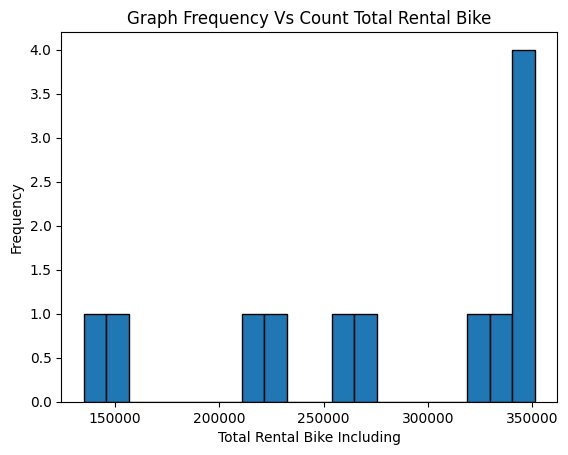

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Menggabungkan data
data_grouped = all_rental.groupby(by=["mnth_x"]).agg({
    "casual_x": "sum",
    "registered_x": "sum",
    "cnt_x": "sum"
})

# menggabungkan keseluruhan cnt_x
cnt_x_data = data_grouped["cnt_x"]

# Plot histogram
plt.hist(cnt_x_data, bins=20, edgecolor='black')
plt.title('Graph Frequency Vs Count Total Rental Bike')
plt.xlabel('Total Rental Bike Including')
plt.ylabel('Frequency')
plt.show()



### Pertanyaan 2: Bagaimana peforma jumlah rental bike pada setiap bulan?

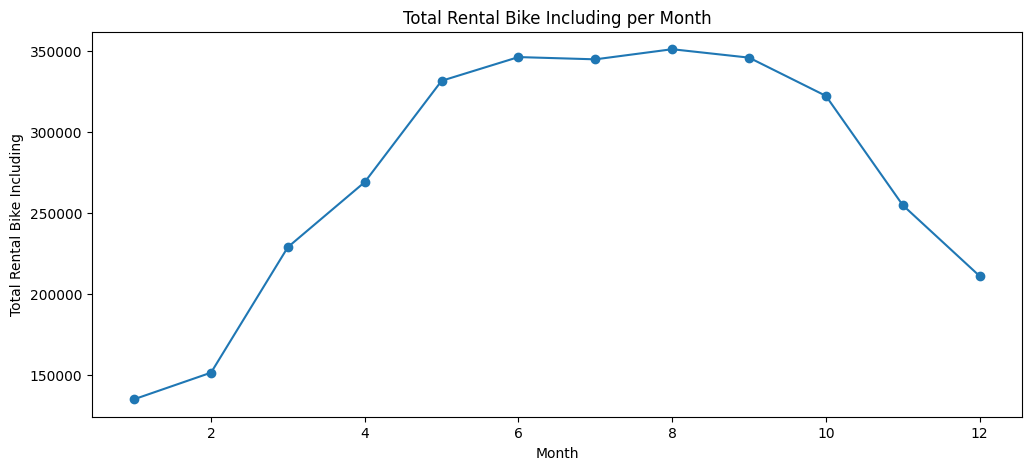

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Membuat Group Data
all_rental_month = all_rental.groupby(by=["mnth_x"]).agg({
    "cnt_x": "sum"
}).reset_index()

# Merubah bulan menjadi bulan 1-12
all_rental_month = all_rental_month.sort_values(by="mnth_x")

# Plot grafik hubungan bulan dan total rental
plt.figure(figsize=(12, 5))
plt.plot(all_rental_month["mnth_x"], all_rental_month["cnt_x"], marker='o')
plt.title('Total Rental Bike Including per Month')
plt.xlabel('Month')
plt.ylabel('Total Rental Bike Including')
plt.show()


### Pertanyaan 3: Bagaimana performa rental bike perbulan pada tipe hari weekend, weekday, dan holiday?

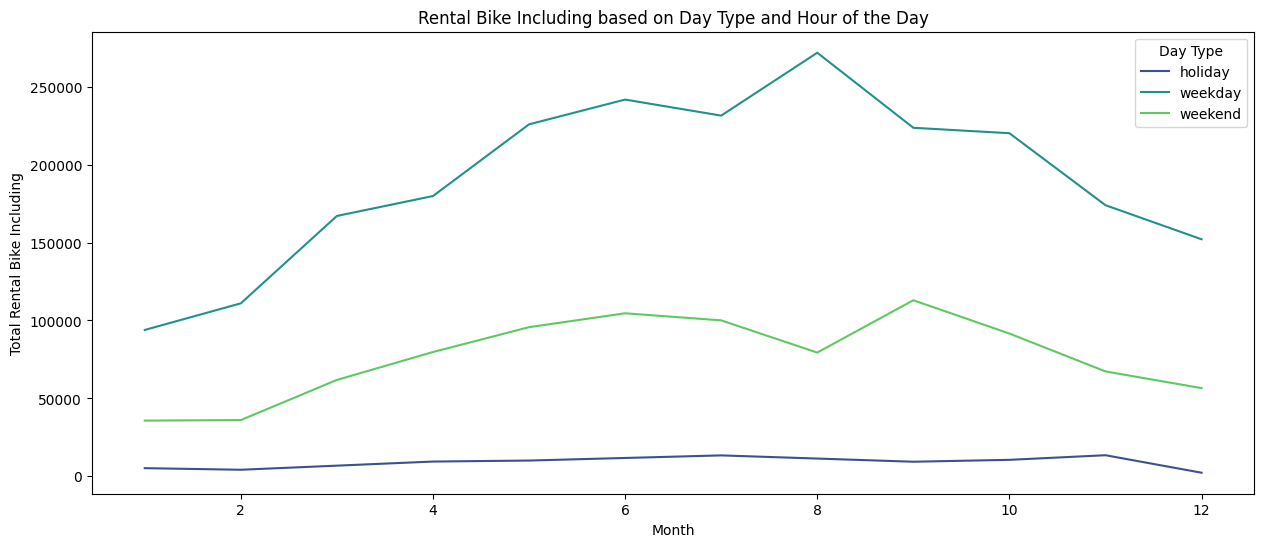

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Mmembuat kolom baru untuk tipe day (holiday, weekday, weekend)
day['day_type'] = 'weekday'
day.loc[day['holiday'] == 1, 'day_type'] = 'holiday'
day.loc[(day['holiday'] == 0) & (day['workingday'] == 0), 'day_type'] = 'weekend'

# Membuat group tipe day
data_grouped = day.groupby(by=["day_type", "mnth"]).agg({
    "cnt": "sum"
}).reset_index()

# Plotting graph
plt.figure(figsize=(15, 6))
sns.lineplot(x="mnth", y="cnt", hue="day_type", data=data_grouped, palette="viridis")
plt.title('Rental Bike Including based on Day Type and Hour of the Day')
plt.xlabel('Month')
plt.ylabel('Total Rental Bike Including')
plt.legend(title="Day Type", loc="upper right")
plt.show()


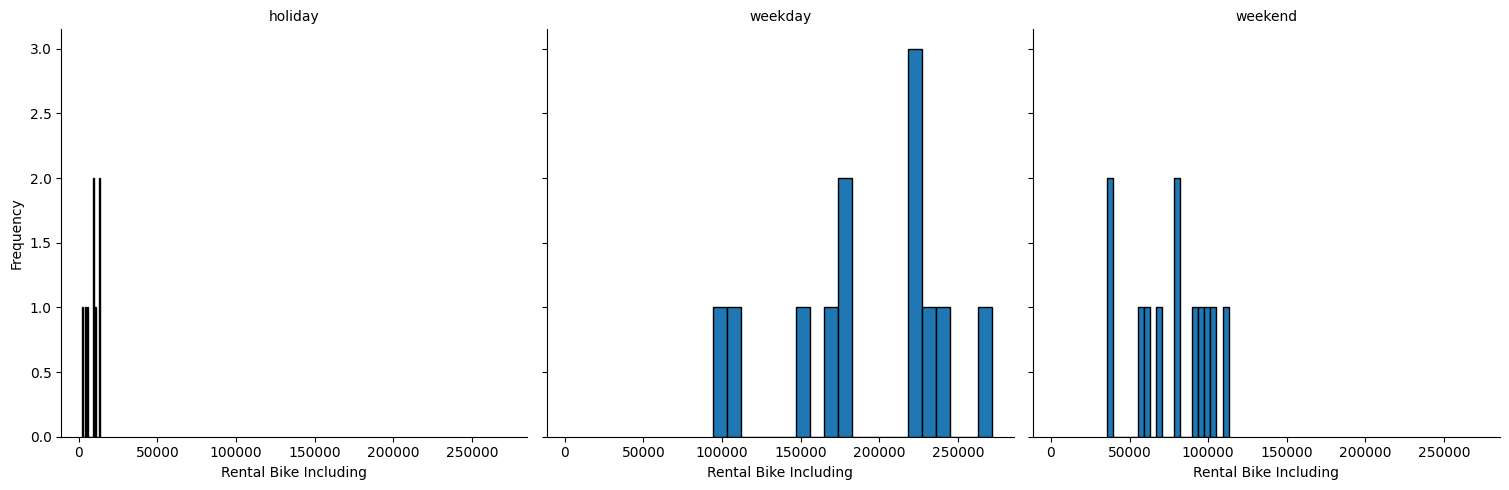

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Membuat kolom untuk tipe day (holiday, workingday, weekend)
day['day_type'] = 'weekday'
day.loc[day['holiday'] == 1, 'day_type'] = 'holiday'
day.loc[(day['holiday'] == 0) & (day['workingday'] == 0), 'day_type'] = 'weekend'

# Grouping by relevant columns
data_grouped = day.groupby(by=["day_type", "mnth"]).agg({
    "cnt": "sum"
}).reset_index()

# Plotting histograms
g = sns.FacetGrid(data_grouped, col="day_type", col_wrap=3, height=5)
g.map(plt.hist, 'cnt', bins=20, edgecolor='black')
g.set_axis_labels('Rental Bike Including', 'Frequency')
g.set_titles(col_template="{col_name}")
plt.show()


# Visualisasi Data Hour

### *Pertanyaan 4: Bagaimana peforma dalam rental sepeda pada hitungan jam?*

In [ ]:
all_rental.groupby(by=["dteday_y", "hr"]).agg({
    "casual_y": "sum",
    "registered_y": "sum",
    "cnt_y": "sum"
})

casual_y  registered_y  cnt_y
dteday_y   hr                               
2011-01-01 0          3            13     16
           1          8            32     40
           2          5            27     32
           3          3            10     13
           4          0             1      1
...                 ...           ...    ...
2011-02-02 15        10            66     76
           16         8            95    103
           17         7           183    190
           18         7           175    182
           19         3            88     91

[731 rows x 3 columns]

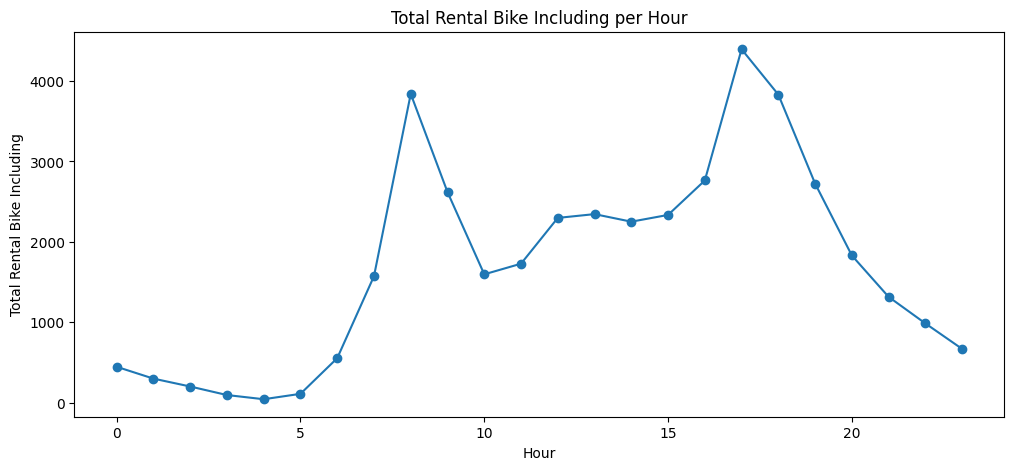

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Membuat Group Data
all_rental_month = all_rental.groupby(by=["hr"]).agg({
    "cnt_y": "sum"
}).reset_index()

# Merubah bulan menjadi bulan 1-12
all_rental_month = all_rental_month.sort_values(by="hr")

# Plot grafik hubungan jam dan total rental
plt.figure(figsize=(12, 5))
plt.plot(all_rental_month["hr"], all_rental_month["cnt_y"], marker='o')
plt.title('Total Rental Bike Including per Hour')
plt.xlabel('Hour')
plt.ylabel('Total Rental Bike Including')
plt.show()


### Pertanyaan 5: Bagaimana performa jumlah rental sepeda pada 2 bulan?

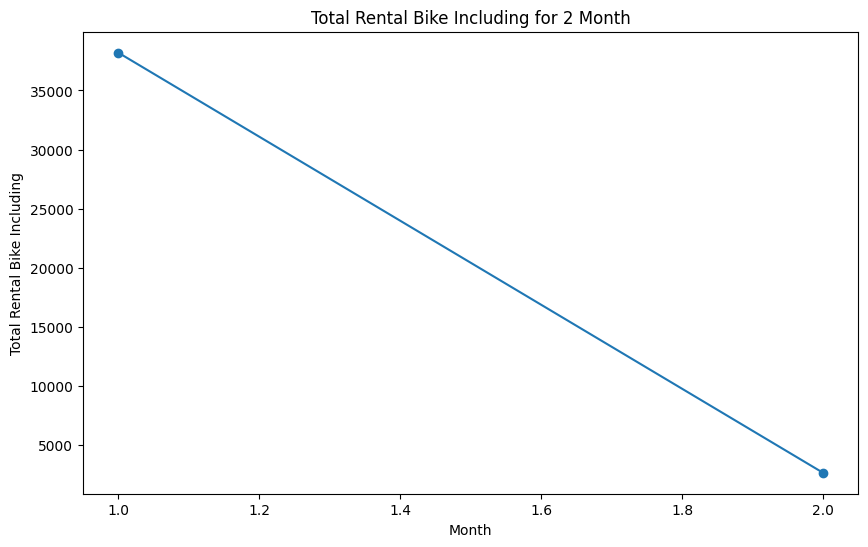

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Membuat Group Data
all_rental_month = all_rental.groupby(by=["mnth_y"]).agg({
    "cnt_y": "sum"
}).reset_index()

# gorup data bulan
all_rental_month = all_rental_month.sort_values(by="mnth_y")

# Plot Graph
plt.figure(figsize=(10, 6))
plt.plot(all_rental_month["mnth_y"], all_rental_month["cnt_y"], marker='o')
plt.title('Total Rental Bike Including for 2 Month')
plt.xlabel('Month')
plt.ylabel('Total Rental Bike Including')
plt.show()


### Pertanyaan 6: Bagaimana performa rental bike dalam hitungan jam pada tipe hari weekend, weekday, dan holiday?

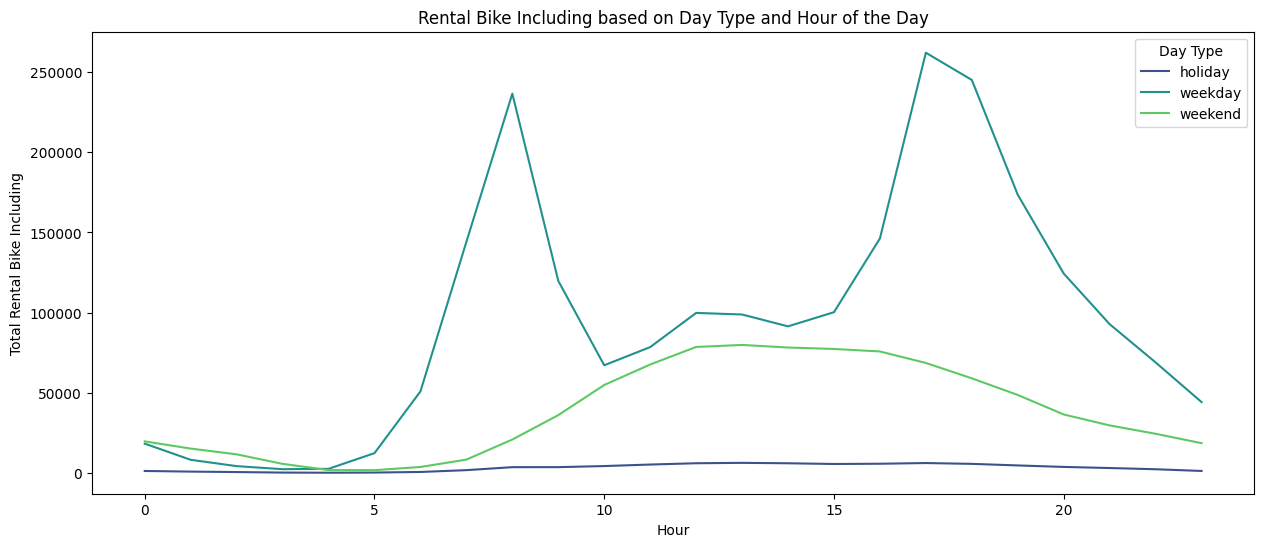

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Mmembuat kolom baru untuk tipe day (holiday, weekday, weekend)
hour['day_type'] = 'weekday'
hour.loc[hour['holiday'] == 1, 'day_type'] = 'holiday'
hour.loc[(hour['holiday'] == 0) & (hour['workingday'] == 0), 'day_type'] = 'weekend'

# Membuat group tipe day
data_grouped = hour.groupby(by=["day_type", "hr"]).agg({
    "cnt": "sum"
}).reset_index()

# Plotting graph
plt.figure(figsize=(15, 6))
sns.lineplot(x="hr", y="cnt", hue="day_type", data=data_grouped, palette="viridis")
plt.title('Rental Bike Including based on Day Type and Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Total Rental Bike Including')
plt.legend(title="Day Type", loc="upper right")
plt.show()


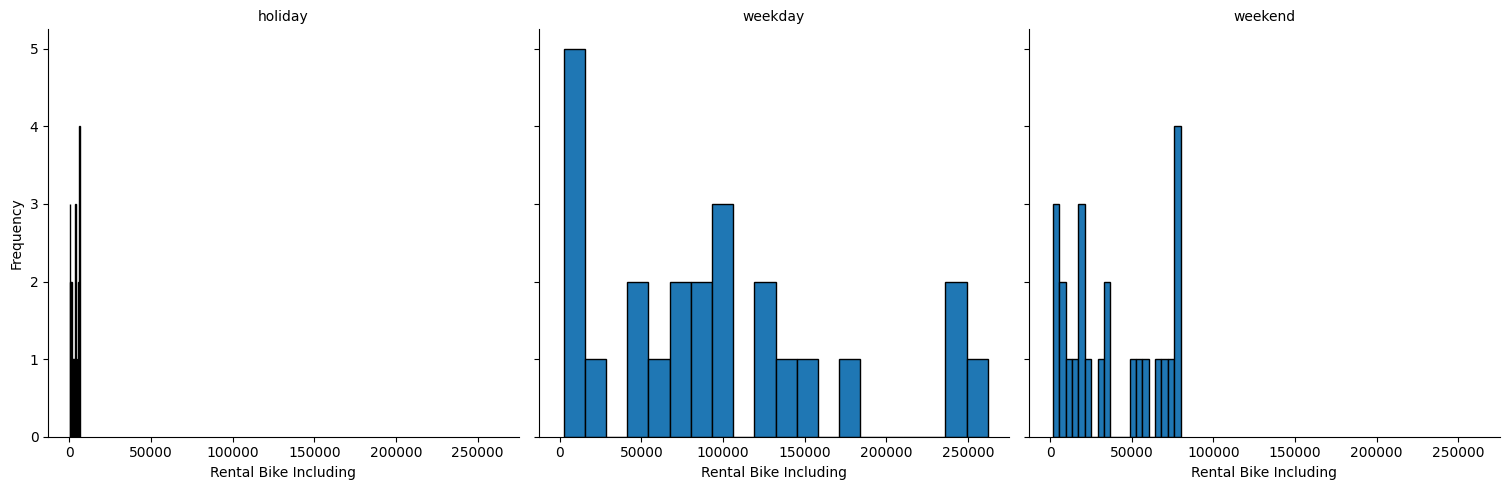

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Membuat kolom untuk tipe day (holiday, workingday, weekend)
hour['day_type'] = 'weekday'
hour.loc[hour['holiday'] == 1, 'day_type'] = 'holiday'
hour.loc[(hour['holiday'] == 0) & (hour['workingday'] == 0), 'day_type'] = 'weekend'

# Grouping by relevant columns
data_grouped = hour.groupby(by=["day_type", "hr"]).agg({
    "cnt": "sum"
}).reset_index()

# Plotting histograms
g = sns.FacetGrid(data_grouped, col="day_type", col_wrap=3, height=5)
g.map(plt.hist, 'cnt', bins=20, edgecolor='black')
g.set_axis_labels('Rental Bike Including', 'Frequency')
g.set_titles(col_template="{col_name}")
plt.show()


## Conclusion

**Pertanyaan**

Pertanyaan 1: Berapa frekuensi pada jumlah rental bike pada setiap bulan?

Pertanyaan 2: Bagaimana peforma jumlah rental bike pada setiap bulan?

Pertanyaan 3: Bagaimana performa rental bike perbulan pada tipe hari weekend, weekday, dan holiday?

Pertanyaan 4: Bagaimana peforma dalam rental sepeda pada hitungan jam?

Pertanyaan 5: Bagaimana performa jumlah rental sepeda pada 2 bulan?

Pertanyaan 6: Bagaimana performa rental bike dalam hitungan jam pada tipe hari weekend, weekday, dan holiday?


**Conculsion**

**- Conclution pertanyaan 1**

  jumlah rental bike including paling banyak pada jumlah 3500000

**- Conclution pertanyaan 2**

  rental bike paling sedikit pada bulan januari dengan total including dibawah 150000

  rental bike paling banyak pada bulan agustus dengan total including 350000

**- Conclution pertanyaan 3**

  pada holiday tidak ada yang rental bike

  pada weekday rental bike lebih banyak dari weekend
  
**- Conclution pertanyaan 4**
  
  total rental including paling banayak pada rental 17 jam yaitu diatas 4000
  
  total rental including paling rendah pada 4 jam yaitu dibawah 1000


**- Conclution pertanyaan 5**
  
  total rental including dari bulan pertama ke bulan kedua dalam sewa jam sangat menurun

**- conclution pertanyaan 6**

  pada holiday tidak ada yang rental bike

  pada weekday rental bike lebih banyak dari weekend



In [ ]:
all_rental.to_csv("all_data.csv", index=False)